In [125]:
import pandas as pd
from pandas import *
#We could see it easier with a graph
# first we need other libraries to make plots possible:
import matplotlib #the main library
import matplotlib.pyplot as plt  #a shortcut that we define as plt

#So ipython notebook can display it
%matplotlib inline 
#just a design line so the graphs look like R's ggplot
#matplotlib.style.use('ggplot') 

pd.__version__

#These 2 files are text files, but they're a cut and paste from Excel spreadsheets
countfile="data/16S_Count_Table.txt"
conditions="data/16S_Conditions.txt"
counts = pd.read_csv(countfile, sep="\t")
conds = pd.read_csv(conditions, sep="\t")

In [126]:
#Look at content of the tables (5 first lines)
counts.head()

,Sample,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,20283,32,12,1,6,117,13217,16039,6,...,0,0,1,0,0,0,0,0,0,0
1,Tongue_P01,32300,12,84,2,6,39,1659,11874,3,...,0,0,0,0,2,0,0,0,0,0
2,Throat_P02,241,871,412,5461,467,2094,0,0,142,...,0,0,0,0,0,0,0,0,0,0
3,Tongue_P02,350,876,4363,1,44,1844,0,0,132,...,0,0,1,0,1,0,0,0,0,0
4,Throat_P03,347,327,245,4894,53,897,19,27,71,...,0,0,0,0,0,0,0,3,0,0


In [127]:
conds.head()

,Samples,Patient,Cavities,SampleType,QC
0,Throat_P01,P01,No_cavities,Throat,Passed
1,Tongue_P01,P01,No_cavities,Tongue,Passed
2,Throat_P02,P02,cavities,Throat,Passed
3,Tongue_P02,P02,cavities,Tongue,Passed
4,Throat_P03,P03,cavities,Throat,Passed


In [128]:
#Let's rename counts Sample column to Samples
counts = counts.rename(columns = {'Sample':'Samples'})
counts.head(n=2)

,Samples,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,20283,32,12,1,6,117,13217,16039,6,...,0,0,1,0,0,0,0,0,0,0
1,Tongue_P01,32300,12,84,2,6,39,1659,11874,3,...,0,0,0,0,2,0,0,0,0,0


In [129]:
#check how pandas is seeing the tables
type(counts)

pandas.core.frame.DataFrame

In [130]:
#Are there any other objects?
mystring = "Oh the sky is so blue today"
type(mystring)

str

In [131]:
mynumbers = "0,1"
type(mynumbers)

str

In [132]:
mynumbers = [0,1]
type(mynumbers)

list

In [133]:
mynumbers = (0,1)
type(mynumbers)

tuple

In [134]:
#check how pandas is treating both tables
type(counts)
type(conds)

pandas.core.frame.DataFrame

In [135]:
#Only the last one appears. Use print to see what you want to see
print type(counts)
type(conds)

<class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [136]:
#Let's have a more user friendly display
print "The count file is :", type(counts)

The count file is : <class 'pandas.core.frame.DataFrame'>


In [137]:
#Hum, we just want the DataFrame part.
print "The count file is :", str(type(counts)).split(".")[-1] #-1 means the last object from the list

The count file is : DataFrame'>


In [138]:
#We don't want the last part
print "The count file is :", str(type(counts)).split(".")[-1].split('\'')[0]  #\ is an escape character

The count file is : DataFrame


In [139]:
#Cool! Let's do it for both of them
print "The count file is :", str(type(counts)).split(".")[-1].split('\'')[0]
print "The condition file is :", str(type(conds)).split(".")[-1].split('\'')[0]

The count file is : DataFrame
The condition file is : DataFrame


In [140]:
#Let's check the shape of the count table:
counts.shape

(48, 52)

In [141]:
#Fancier
print "Count table has:"
print counts.shape[0],"rows"
print counts.shape[1],"columns"

Count table has:
48 rows
52 columns


In [142]:
#Display the column names
counts.columns.values


array(['Samples', 'Streptococcus_mutans', 'Porphyromonas_gingivalis',
       'Pseudomonas', 'Prevotella_maculosa', 'Staphylococcus_aureus',
       'Vibrio', 'Fusobacterium', 'Proteus', 'Stenotrophomonas',
       'Haemophilus', 'Escherichia', 'Brucella', 'Weissella',
       'Propionibacterium', 'Eikenella', 'Staphylococcus_epidermidis',
       'Clostridium', 'Streptococcus_anginosus', 'Methylotenera',
       'Corynebacterium_tuberculostearicum', 'Bifidobacterium',
       'Campylobacter', 'Achromobacter', 'Neisseria',
       'Lactobacillus_johnsonii', 'Enterobacter', 'Chryseobacterium',
       'Peptoniphilus', 'Dolosigranulum', 'Klebsiella_oxytoca',
       'Acinetobacter', 'Veillonella', 'Comamonas', 'Variovorax',
       'Diaphorobacter', 'Finegoldia', 'Corynebacterium', 'Moraxella',
       'Prevotella_bivia', 'Corynebacterium_glutamicum',
       'Prevotella_buccalis', 'Klebsiella_pneumoniae',
       'Streptococcus_pyogenes', 'Porphyromonas', 'Lactobacillus_sakei',
       'Peptostreptoco

In [143]:
#put them in a list
list(counts.columns.values)

['Samples',
 'Streptococcus_mutans',
 'Porphyromonas_gingivalis',
 'Pseudomonas',
 'Prevotella_maculosa',
 'Staphylococcus_aureus',
 'Vibrio',
 'Fusobacterium',
 'Proteus',
 'Stenotrophomonas',
 'Haemophilus',
 'Escherichia',
 'Brucella',
 'Weissella',
 'Propionibacterium',
 'Eikenella',
 'Staphylococcus_epidermidis',
 'Clostridium',
 'Streptococcus_anginosus',
 'Methylotenera',
 'Corynebacterium_tuberculostearicum',
 'Bifidobacterium',
 'Campylobacter',
 'Achromobacter',
 'Neisseria',
 'Lactobacillus_johnsonii',
 'Enterobacter',
 'Chryseobacterium',
 'Peptoniphilus',
 'Dolosigranulum',
 'Klebsiella_oxytoca',
 'Acinetobacter',
 'Veillonella',
 'Comamonas',
 'Variovorax',
 'Diaphorobacter',
 'Finegoldia',
 'Corynebacterium',
 'Moraxella',
 'Prevotella_bivia',
 'Corynebacterium_glutamicum',
 'Prevotella_buccalis',
 'Klebsiella_pneumoniae',
 'Streptococcus_pyogenes',
 'Porphyromonas',
 'Lactobacillus_sakei',
 'Peptostreptococcus',
 'Streptococcus_pneumoniae',
 'Dialister',
 'Streptococcus

In [144]:
#how about row names? Our table if a table made of counts, but pandas reads it as a collection of columns
counts[[0]].head()


,Samples
0,Throat_P01
1,Tongue_P01
2,Throat_P02
3,Tongue_P02
4,Throat_P03


In [145]:
#another way of calling the first column:
counts['Samples'].head()

0    Throat_P01
1    Tongue_P01
2    Throat_P02
3    Tongue_P02
4    Throat_P03
Name: Samples, dtype: object

In [146]:
#How about looking at a particular cell: 3rd row, Samples column
counts.loc[2, 'Samples']

'Throat_P02'

In [147]:
#More rows?
counts.loc[2:5, 'Samples']

2    Throat_P02
3    Tongue_P02
4    Throat_P03
5    Tongue_P03
Name: Samples, dtype: object

In [148]:
#More columns?
counts.loc[2:5, 'Samples':'Staphylococcus_aureus']

,Samples,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus
2,Throat_P02,241,871,412,5461,467
3,Tongue_P02,350,876,4363,1,44
4,Throat_P03,347,327,245,4894,53
5,Tongue_P03,321,795,4760,0,25


In [149]:
#More selective?
counts.loc[[0,2,4], ['Samples','Pseudomonas']]

,Samples,Pseudomonas
0,Throat_P01,12
2,Throat_P02,412
4,Throat_P03,245


In [150]:
#Even more!
counts.loc[counts['Pseudomonas'] > 5000 , ['Samples','Pseudomonas']]

,Samples,Pseudomonas
7,Tongue_P04,7419
25,Tongue_P15,7524
29,Tongue_P17,5557
47,Tongue_P33,5706


In [151]:
#We don't have to, but sometimes it is easier to specify that the first column are row names, i.e. index
indexed_counts = counts.set_index(['Samples'])
indexed_counts.head(n=3)

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,20283,32,12,1,6,117,13217,16039,6,1,...,0,0,1,0,0,0,0,0,0,0
Tongue_P01,32300,12,84,2,6,39,1659,11874,3,2,...,0,0,0,0,2,0,0,0,0,0
Throat_P02,241,871,412,5461,467,2094,0,0,142,16,...,0,0,0,0,0,0,0,0,0,0


In [152]:
#Pandas choose numbers as row names and calls it index. Each index number is unique, so each row is unique.
#You can't have duplicates as index
counts.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
           dtype='int64')

In [153]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [154]:
#Let's look at the other table:
conds.head()


,Samples,Patient,Cavities,SampleType,QC
0,Throat_P01,P01,No_cavities,Throat,Passed
1,Tongue_P01,P01,No_cavities,Tongue,Passed
2,Throat_P02,P02,cavities,Throat,Passed
3,Tongue_P02,P02,cavities,Tongue,Passed
4,Throat_P03,P03,cavities,Throat,Passed


In [155]:
#How many patient in total? Several methods:
len(conds)  #size of the dataframe


48

In [156]:
#each row has 2 patients so we just have to divide by 2:
print "The number of patients is:", len(conds)/2

The number of patients is: 24


In [157]:
#This method is a leap of faith: Are we sure there is a patient every 2 rows?
#let's checck the end of the dataframe:
conds.tail()

,Samples,Patient,Cavities,SampleType,QC
43,Tongue_P30,P30,cavities,Tongue,Failed
44,Throat_P31,P31,No_cavities,Throat,Passed
45,Tongue_P31,P31,No_cavities,Tongue,Passed
46,Throat_P33,P33,cavities,Throat,Passed
47,Tongue_P33,P33,cavities,Tongue,Passed


In [158]:
#We still see 2 patients per row, but the table seems to suggest we have 33 patients.
#This method was not safe. Let's try another one:
#Display the content of the column Patient
conds["Patient"]

0     P01
1     P01
2     P02
3     P02
4     P03
5     P03
6     P04
7     P04
8     P05
9     P05
10    P06
11    P06
12    P07
13    P07
14    P08
15    P08
16    P09
17    P09
18    P10
19    P10
20    P12
21    P12
22    P14
23    P14
24    P15
25    P15
26    P16
27    P16
28    P17
29    P17
30    P18
31    P18
32    P19
33    P19
34    P20
35    P20
36    P21
37    P21
38    P22
39    P22
40    P28
41    P28
42    P30
43    P30
44    P31
45    P31
46    P33
47    P33
Name: Patient, dtype: object

In [159]:
#we have 48 rows and a patient each 2 lines
#this method is tedious. Imagine we have 100s of lines
#I'll repeat this one but I'll remove the duplicates
conds.Patient.drop_duplicates() #or conds["Patient"].drop_duplicates()


0     P01
2     P02
4     P03
6     P04
8     P05
10    P06
12    P07
14    P08
16    P09
18    P10
20    P12
22    P14
24    P15
26    P16
28    P17
30    P18
32    P19
34    P20
36    P21
38    P22
40    P28
42    P30
44    P31
46    P33
Name: Patient, dtype: object

In [160]:
#We see it better, but we have to count the number of lines, which again is tedious.
#Now let's count the column length once we removed the duplicates
print "The number of patients is:", len(conds["Patient"].drop_duplicates())

The number of patients is: 24


In [161]:
#Let's take a look at the conditions again
conds.head()

,Samples,Patient,Cavities,SampleType,QC
0,Throat_P01,P01,No_cavities,Throat,Passed
1,Tongue_P01,P01,No_cavities,Tongue,Passed
2,Throat_P02,P02,cavities,Throat,Passed
3,Tongue_P02,P02,cavities,Tongue,Passed
4,Throat_P03,P03,cavities,Throat,Passed


In [162]:
#How many categories do we have in Cavities column:
conds.Cavities.drop_duplicates()

0    No_cavities
2       cavities
Name: Cavities, dtype: object

In [163]:
#Only 2: cavities and No_cavities
#How many patients have cavities?
conds["Cavities"] == "cavities" #OR conds.Cavities == "cavities"

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27    False
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44    False
45    False
46     True
47     True
Name: Cavities, dtype: bool

In [164]:
#it works, but not user friendly again.
len(conds.Cavities == "cavities")

48

In [165]:
#that one doesn't work and is quite misleading. 
# == sign is calling for a True False answer
#Now we want to count how  many lines have a "cavities" entry
#Let's first extract a new dataframe with only the cavities entries
conds[conds["Cavities"] == "cavities"]

,Samples,Patient,Cavities,SampleType,QC
2,Throat_P02,P02,cavities,Throat,Passed
3,Tongue_P02,P02,cavities,Tongue,Passed
4,Throat_P03,P03,cavities,Throat,Passed
5,Tongue_P03,P03,cavities,Tongue,Passed
6,Throat_P04,P04,cavities,Throat,Passed
7,Tongue_P04,P04,cavities,Tongue,Passed
8,Throat_P05,P05,cavities,Throat,Passed
9,Tongue_P05,P05,cavities,Tongue,Passed
12,Throat_P07,P07,cavities,Throat,Passed
13,Tongue_P07,P07,cavities,Tongue,Passed


In [166]:
#Now we don't want to count 2 times a patient
#Note: the index is still the same as in the main dataframe
#We'll repeat the same command, but we'll remove duplicates
conds[conds["Cavities"] == "cavities"].drop_duplicates('Patient')

,Samples,Patient,Cavities,SampleType,QC
2,Throat_P02,P02,cavities,Throat,Passed
4,Throat_P03,P03,cavities,Throat,Passed
6,Throat_P04,P04,cavities,Throat,Passed
8,Throat_P05,P05,cavities,Throat,Passed
12,Throat_P07,P07,cavities,Throat,Passed
20,Throat_P12,P12,cavities,Throat,Failed
22,Throat_P14,P14,cavities,Throat,Failed
24,Throat_P15,P15,cavities,Throat,Passed
28,Throat_P17,P17,cavities,Throat,Passed
30,Throat_P18,P18,cavities,Throat,Passed


In [167]:
#We just have to add commands separated by "." to make successive commands
len(conds[conds["Cavities"] == "cavities"].drop_duplicates('Patient'))

17

In [168]:
#We have 17 patients with cavities and ... 7 without? (24 patients in total)
len(conds[conds["Cavities"] == "No_cavities"].drop_duplicates('Patient'))

7

In [169]:
#A last but better and more powerful method: the groupby() function 
len(conds.groupby("Cavities"))

2

In [170]:
#That means we have 2 categories. Indeed: cavities and No_cavities
#grouby splits the dataframe and create a groupby object
grouped = conds.groupby("Cavities")
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [171]:
#We can look into a groupby object with first and last
grouped.first()

,Samples,Patient,SampleType,QC
Cavities,,,,
No_cavities,Throat_P01,P01,Throat,Passed
cavities,Throat_P02,P02,Throat,Passed


In [172]:
grouped.last()

,Samples,Patient,SampleType,QC
Cavities,,,,
No_cavities,Tongue_P31,P31,Tongue,Passed
cavities,Tongue_P33,P33,Tongue,Passed


In [173]:
#The sum() function will add all values in columns for each group name
grouped.sum()

,Samples,Patient,SampleType,QC
Cavities,,,,
No_cavities,Throat_P01Tongue_P01Throat_P06Tongue_P06Throat...,P01P01P06P06P08P08P09P09P10P10P16P16P31P31,ThroatTongueThroatTongueThroatTongueThroatTong...,PassedPassedPassedPassedPassedPassedPassedPass...
cavities,Throat_P02Tongue_P02Throat_P03Tongue_P03Throat...,P02P02P03P03P04P04P05P05P07P07P12P12P14P14P15P...,ThroatTongueThroatTongueThroatTongueThroatTong...,PassedPassedPassedPassedPassedPassedPassedPass...


In [174]:
#See what the groups are made of
grouped.groups

{'No_cavities': [0L,
  1L,
  10L,
  11L,
  14L,
  15L,
  16L,
  17L,
  18L,
  19L,
  26L,
  27L,
  44L,
  45L],
 'cavities': [2L,
  3L,
  4L,
  5L,
  6L,
  7L,
  8L,
  9L,
  12L,
  13L,
  20L,
  21L,
  22L,
  23L,
  24L,
  25L,
  28L,
  29L,
  30L,
  31L,
  32L,
  33L,
  34L,
  35L,
  36L,
  37L,
  38L,
  39L,
  40L,
  41L,
  42L,
  43L,
  46L,
  47L]}

In [175]:
#how many elements compose the groups
grouped.count()

,Samples,Patient,SampleType,QC
Cavities,,,,
No_cavities,14,14,14,14
cavities,34,34,34,34


In [176]:
#Let's check how many patients are in the groups
grouped["Patient"].nunique()

Cavities
No_cavities     7
cavities       17
Name: Patient, dtype: int64

In [177]:
#Now let's check the data for patient08
conds.loc[conds.Patient == "P08"]

,Samples,Patient,Cavities,SampleType,QC
14,Throat_P08,P08,No_cavities,Throat,Passed
15,Tongue_P08,P08,No_cavities,Tongue,Passed


In [178]:
#Now let's check the data for patient08 and 12
conds.loc[(conds.Patient == "P08") | (conds.Patient == "P12")]

,Samples,Patient,Cavities,SampleType,QC
14,Throat_P08,P08,No_cavities,Throat,Passed
15,Tongue_P08,P08,No_cavities,Tongue,Passed
20,Throat_P12,P12,cavities,Throat,Failed
21,Tongue_P12,P12,cavities,Tongue,Failed


In [179]:
# "|" is the OR condition. What happens if I choose the & condition?
conds.loc[(conds.Patient == "P08") & (conds.Patient == "P12")]

,Samples,Patient,Cavities,SampleType,QC


In [180]:
# Nothing. Indeed, patient8 and patient12 are not the same patient
#If I want to see the throat record for patient08
conds.loc[(conds['Patient'] == "P08") & (conds['SampleType'] == "Throat") ]

,Samples,Patient,Cavities,SampleType,QC
14,Throat_P08,P08,No_cavities,Throat,Passed


In [181]:
#PAUSE


In [182]:
#Let's look at first 2 rows of the counts table, i.e. patient 01
counts.head(n=2)

,Samples,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,20283,32,12,1,6,117,13217,16039,6,...,0,0,1,0,0,0,0,0,0,0
1,Tongue_P01,32300,12,84,2,6,39,1659,11874,3,...,0,0,0,0,2,0,0,0,0,0


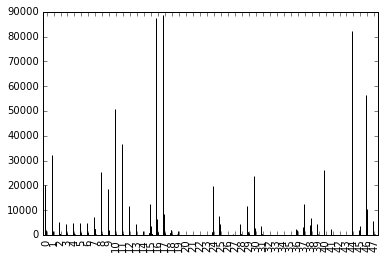

In [183]:
#pandas makes plot really easily. We just add .plot() to the dataframe
#(The time to display the figure depends on the computer: 5/20 seconds)
counts.plot(kind="bar", legend=False)

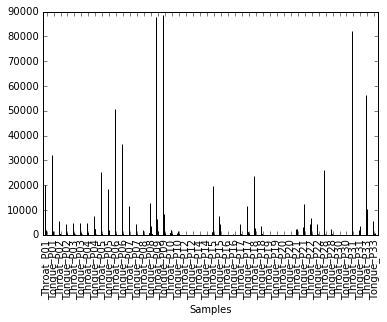

In [184]:
#Remarks:
#1. the counts abundance varies a lot
#2. The numbers on the x-axis don't help identifying which is which

#Let's add the sample id in the x-axis
counts.plot(x="Samples", kind="bar", legend=False)

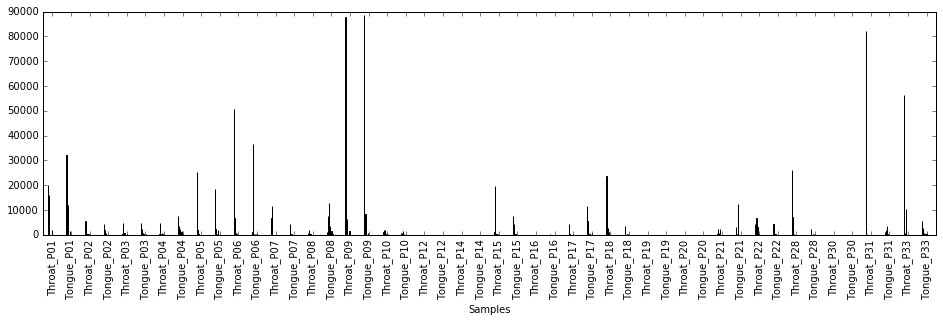

In [185]:
#better but the graph is still messy. Let's make it larger
counts.plot(x="Samples", kind="bar", legend=False,figsize=(16,4))

In [186]:
# One answer to remark1 could be to log+1 the abundance (+1 to remove log0)
#I have to remove the Sample column in order to be quicker. I'll put it as an index
log_counts = np.log(indexed_counts)

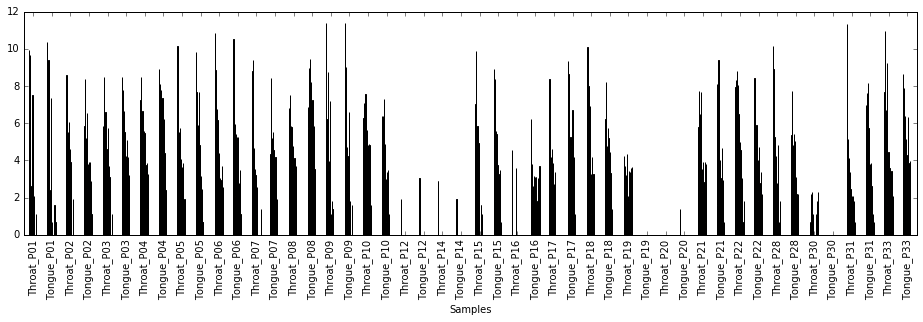

In [187]:
log_counts.plot(kind="bar", legend=False,figsize=(16,4))

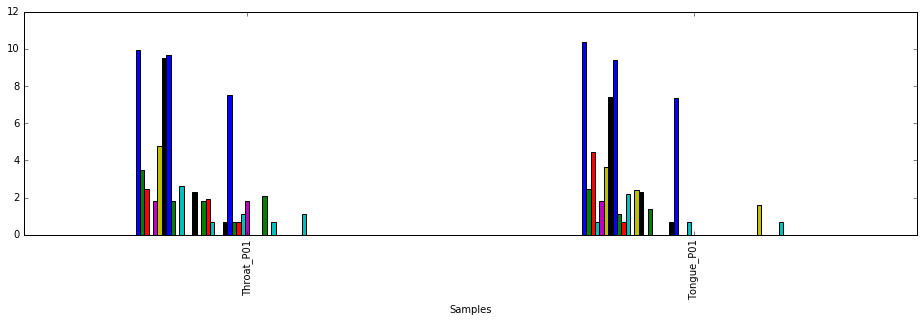

In [188]:
#Let's look at patient1
log_counts.head(n=2).plot(kind="bar", legend=False,figsize=(16,4))

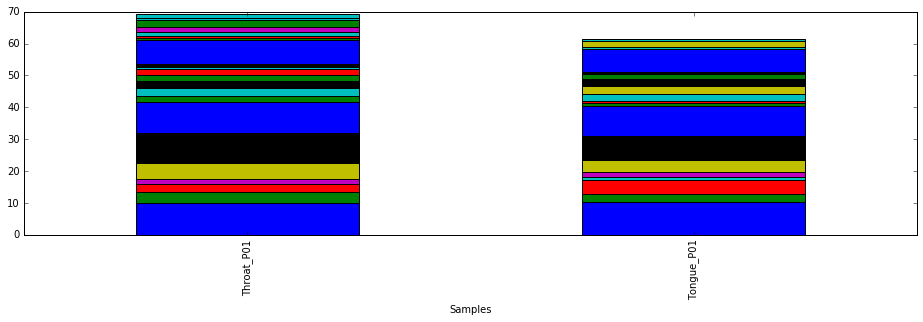

In [189]:
#as stacked bars
log_counts.head(n=2).plot(kind="bar", legend=False,figsize=(16,4), stacked=True)

In [190]:
#Let's look at the proportions: I'll divide every counts by the sum of the row ands multiply by 100
#First, let's make a duplicate of counts, that we will call prop_counts
prop_counts = indexed_counts.copy()
#let's define a new column which will be the sum of all rows
prop_counts["Total"] = prop_counts.sum(axis=1)
indexed_counts.head(n=2)

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,20283,32,12,1,6,117,13217,16039,6,1,...,0,0,1,0,0,0,0,0,0,0
Tongue_P01,32300,12,84,2,6,39,1659,11874,3,2,...,0,0,0,0,2,0,0,0,0,0


In [191]:
#Before dividing by Total, we should remove any total that is zero
prop_counts = prop_counts.loc[prop_counts['Total'] > 0]
#Now let's divide every counts by the total value:
prop_counts = prop_counts.div(prop_counts["Total"], axis='index')
prop_counts.head(n=2)

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma,Total
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,0.392526,0.000619,0.000232,0.000019,0.000116,0.002264,0.255782,0.310394,0.000116,0.000019,...,0,0.000019,0,0.000000,0,0,0,0,0,1
Tongue_P01,0.678942,0.000252,0.001766,0.000042,0.000126,0.000820,0.034872,0.249590,0.000063,0.000042,...,0,0.000000,0,0.000042,0,0,0,0,0,1


In [192]:
#Now will multiply by a hundred
prop_counts = prop_counts * 100
prop_counts.head(n=2)

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma,Total
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,39.252608,0.061928,0.023223,0.001935,0.011611,0.226424,25.578155,31.039421,0.011611,0.001935,...,0,0.001935,0,0.000000,0,0,0,0,0,100
Tongue_P01,67.894228,0.025224,0.176567,0.004204,0.012612,0.081978,3.487199,24.959011,0.006306,0.004204,...,0,0.000000,0,0.004204,0,0,0,0,0,100


In [193]:
#And remove the column Total that we don't need anymore
prop_counts = prop_counts.drop('Total',1)
prop_counts.head(n=2)

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,39.252608,0.061928,0.023223,0.001935,0.011611,0.226424,25.578155,31.039421,0.011611,0.001935,...,0,0,0.001935,0,0.000000,0,0,0,0,0
Tongue_P01,67.894228,0.025224,0.176567,0.004204,0.012612,0.081978,3.487199,24.959011,0.006306,0.004204,...,0,0,0.000000,0,0.004204,0,0,0,0,0


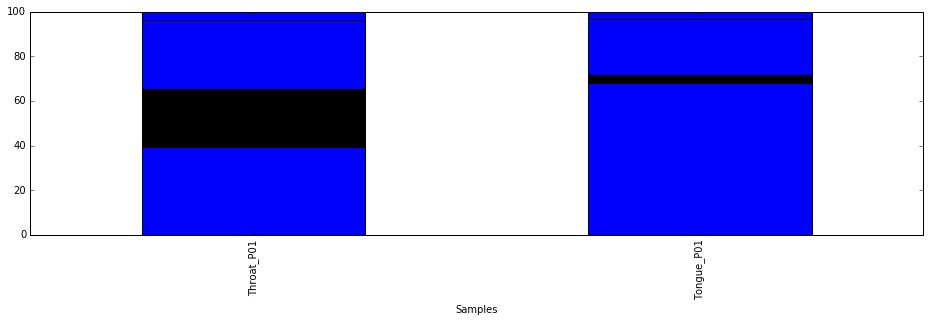

In [194]:
#Let's look at patient1
prop_counts.head(n=2).plot(kind="bar", legend=False,figsize=(16,4),stacked=True)

In [195]:
#Let's look at patient12
# .loc["row_id", "column_id"] allows you to select rows and columns
# : means all (rows or columns)
patient12 = prop_counts.loc['Throat_P12':'Tongue_P12', : ]
patient12

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P12,77.777778,11.111111,11.111111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tongue_P12,50.000000,50.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


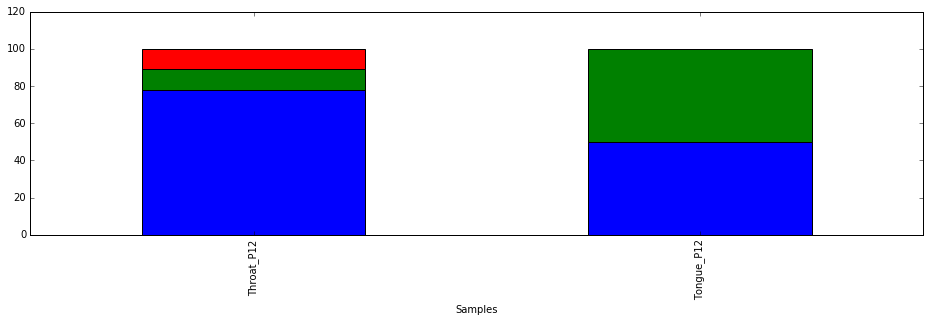

In [196]:
#Now let's represent the bacteria proportion
patient12.plot(kind="bar", legend=False,figsize=(16,4),stacked=True)

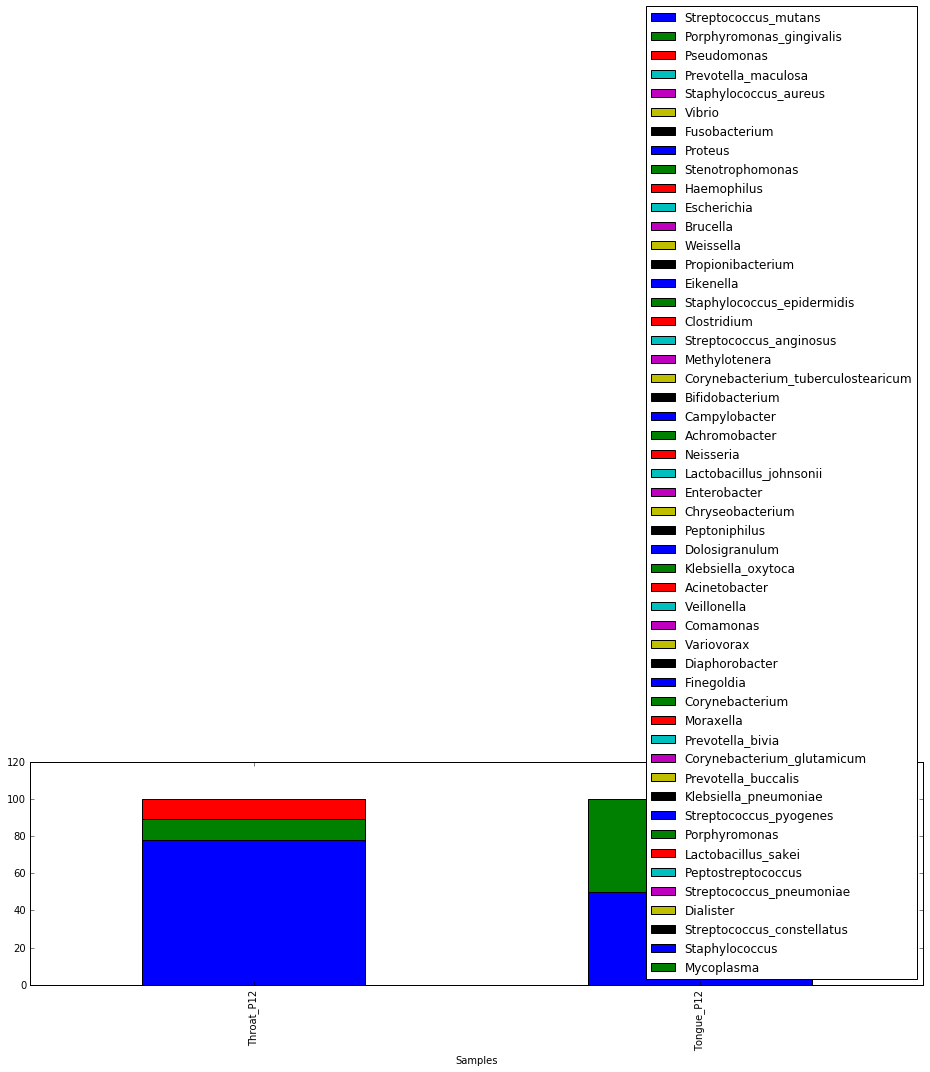

In [197]:
#Not as many bacteria, right? Looks suspicious. Let's add the legend to identify the bacteria
patient12.plot(kind="bar", legend=True,figsize=(16,4),stacked=True)


In [198]:
#awful. Pandas is good for exploring data, not the best when it goes to design. Let's apply a patch


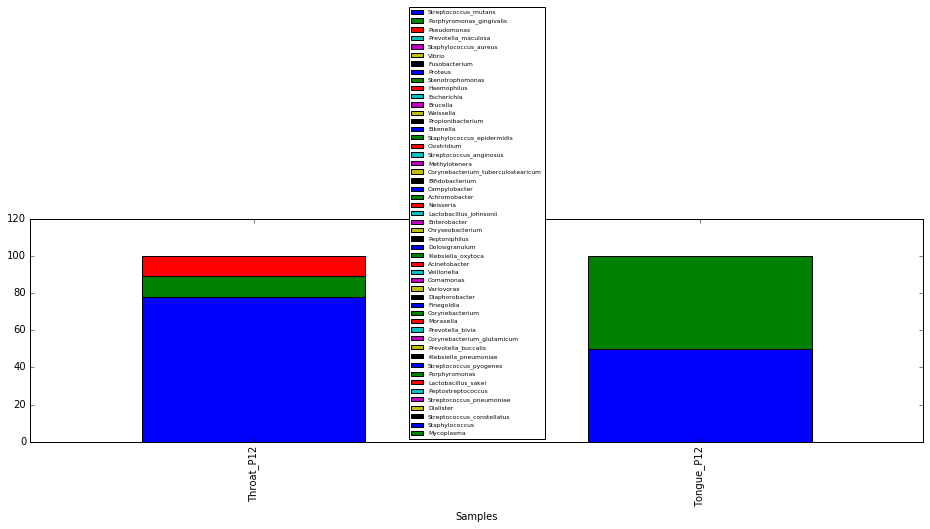

In [199]:
ax = patient12.plot(kind="bar", legend=False,figsize=(16,4),stacked=True)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best', prop={'size':6})

In [200]:
#Well it's not really better. Let's remove all the bacteria that don't have a count
#Let's keep only the bacteria that do not add up to zero 
patient12_reduced = patient12.loc[ : , patient12.sum(axis=0) != 0]
patient12_reduced

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas
Samples,,,
Throat_P12,77.777778,11.111111,11.111111
Tongue_P12,50.000000,50.000000,0.000000


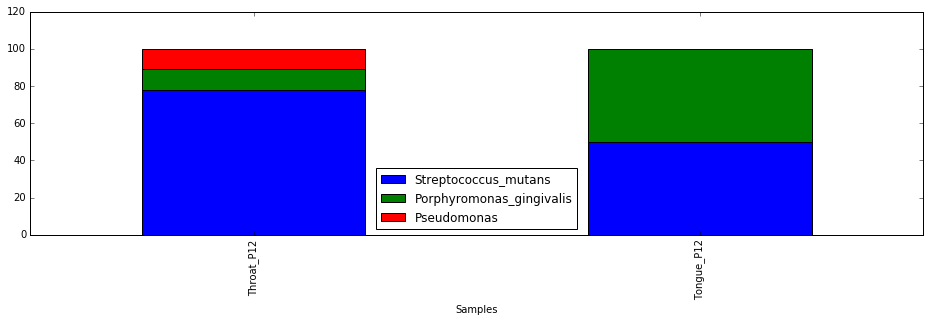

In [201]:
patient12_reduced.plot(kind="bar", legend=True,figsize=(16,4),stacked=True)

In [202]:
#That does seem suspicious. Let's look at the count table for patient12
counts.loc[(counts["Samples"] == 'Throat_P12') | (counts["Samples"] == 'Tongue_P12')]

,Samples,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
20,Throat_P12,7,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,Tongue_P12,21,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
#The counts are quite small. Let's look at the mean values
#The describe function will calculate a bunch of statistics
#Note: .T. is to transpose the dataframe so we don't look at the bacteria count statistics, but at the samples
# .astype(int) is to transform floats to integer (less messy)
sample_statistics = indexed_counts.T.describe().astype(int)
sample_statistics

Samples,Throat_P01,Tongue_P01,Throat_P02,Tongue_P02,Throat_P03,Tongue_P03,Throat_P04,Tongue_P04,Throat_P05,Tongue_P05,...,Throat_P22,Tongue_P22,Throat_P28,Tongue_P28,Throat_P30,Tongue_P30,Throat_P31,Tongue_P31,Throat_P33,Tongue_P33
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
mean,1013,932,220,179,175,218,216,507,609,626,...,469,141,729,86,1,0,1625,160,1503,261
std,3986,4785,816,667,696,749,721,1380,3559,2764,...,1244,648,3801,329,2,0,11509,581,7996,899
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50%,1,1,0,1,7,1,18,4,3,2,...,20,6,1,4,0,0,1,2,16,12
75%,6,3,91,40,79,70,125,198,33,21,...,136,34,39,45,2,0,7,37,82,84
max,20283,32300,5461,4363,4894,4760,4785,7419,25406,18523,...,6720,4524,26312,2254,10,1,82207,3578,56444,5706


In [204]:
#Patient30 stats are way below the others. Let's look at patient12
sample_statistics[["Throat_P12","Tongue_P12"]]

Samples,Throat_P12,Tongue_P12
count,51,51
mean,0,0
std,0,4
min,0,0
25%,0,0
50%,0,0
75%,0,0
max,7,21


In [210]:
prop_counts.head()

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P01,39.252608,0.061928,0.023223,0.001935,0.011611,0.226424,25.578155,31.039421,0.011611,0.001935,...,0,0,0.001935,0,0.000000,0,0,0.000000,0,0
Tongue_P01,67.894228,0.025224,0.176567,0.004204,0.012612,0.081978,3.487199,24.959011,0.006306,0.004204,...,0,0,0.000000,0,0.004204,0,0,0.000000,0,0
Throat_P02,2.143365,7.746354,3.664176,48.568125,4.153326,18.623266,0.000000,0.000000,1.262896,0.142298,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
Tongue_P02,3.821795,9.565407,47.641406,0.010919,0.480454,20.135401,0.000000,0.000000,1.441363,0.087355,...,0,0,0.010919,0,0.010919,0,0,0.000000,0,0
Throat_P03,3.887084,3.663045,2.744483,54.822449,0.593704,10.048168,0.212837,0.302453,0.795340,0.212837,...,0,0,0.000000,0,0.000000,0,0,0.033606,0,0


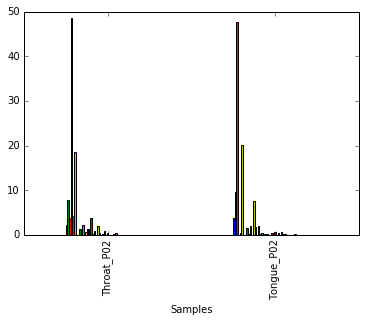

In [215]:
#We'll come back to patients 12 and 30 later
#Let's take patient 2. And look at the bar chart
patient2= prop_counts.ix[2:4,]
patient2.plot(kind='bar', legend = False)

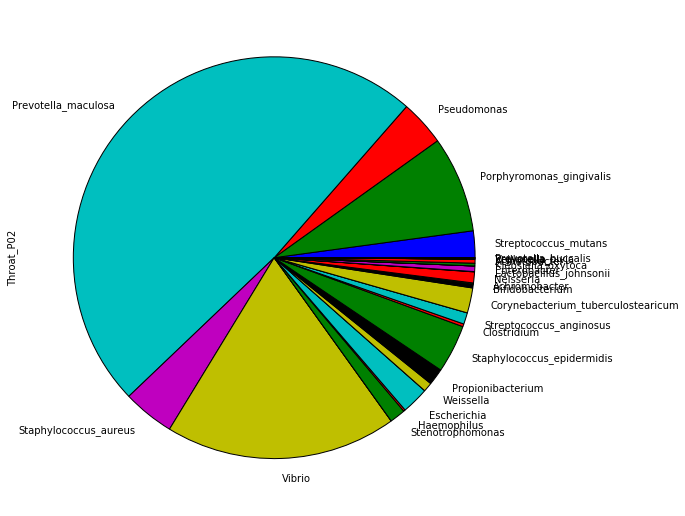

In [216]:
#We don't see the labels well enough because of the colouring.
#Let's try to see it as a pie chart. First the throat

patient2.ix["Throat_P02"].plot.pie(figsize=(9, 9))

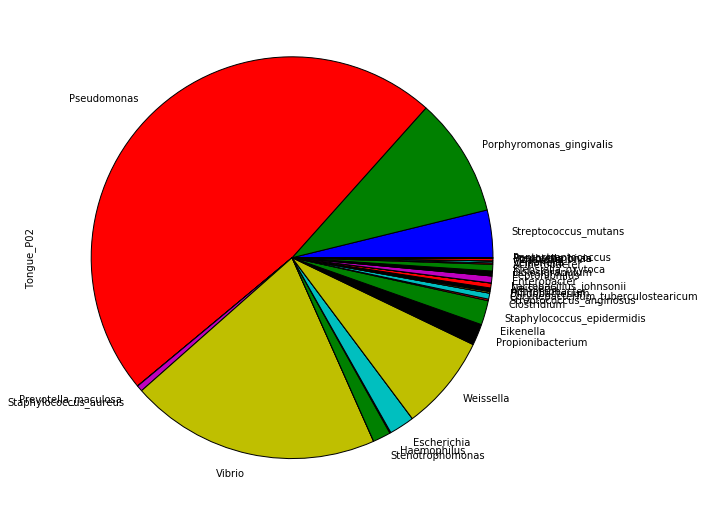

In [217]:
#Now the tongue
patient2.ix["Tongue_P02"].head()
patient2.ix["Tongue_P02"].plot.pie(figsize=(9, 9))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000005D5EDB38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000005E448198>], dtype=object)

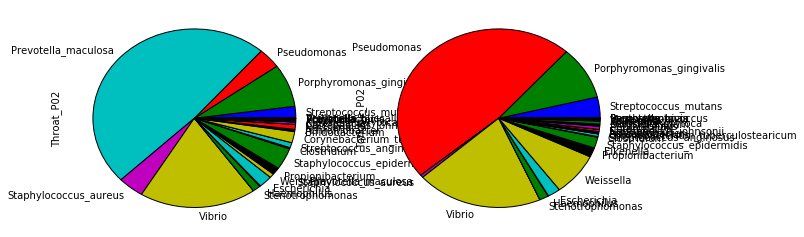

In [218]:
#together.
#Note: I have to transpose the matrix in order to have only 2 plots

patient2.T.plot.pie(subplots=True, figsize=(10, 4), legend=False)

In [219]:
#Some colors are the same. Let's write a color fix
from matplotlib.pyplot import cm 
cm_name = 'Pastel1'
color_map = cm.get_cmap(cm_name)
num_of_colors = len(patient2.columns)
mycolors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000005E9F1B38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000005EB9BF60>], dtype=object)

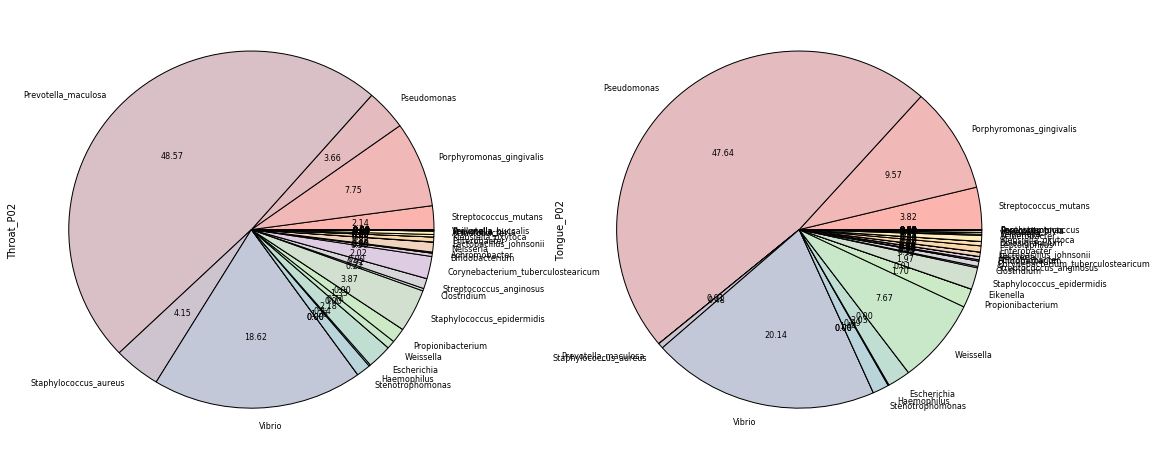

In [220]:
#Now we will add the percentages inside the pie
patient2.T.plot.pie(subplots=True, figsize=(18, 8), legend=False, colors=mycolors, autopct='%.2f', fontsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000005E31C4A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000005F5E49E8>]], dtype=object)

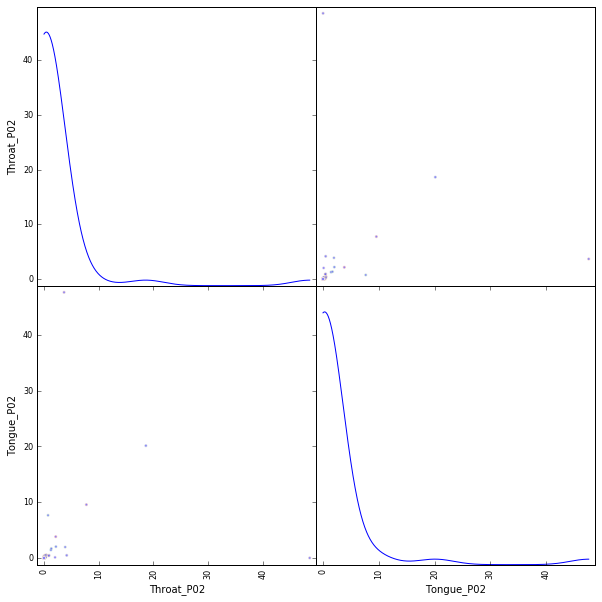

In [221]:
#We could now compare the count scatter between the 2 samples
scatter_matrix(patient2.T, figsize=(10, 10), diagonal='kde', color=mycolors)

In [222]:
#The biggest difference lies in counts below 10% of total abundance
patient2

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Samples,,,,,,,,,,,,,,,,,,,,,
Throat_P02,2.143365,7.746354,3.664176,48.568125,4.153326,18.623266,0,0,1.262896,0.142298,...,0,0,0.000000,0,0.000000,0,0,0,0,0
Tongue_P02,3.821795,9.565407,47.641406,0.010919,0.480454,20.135401,0,0,1.441363,0.087355,...,0,0,0.010919,0,0.010919,0,0,0,0,0


In [223]:
#We want to see more complex patterns. Let's join conditions and counts table using merge
data = pd.merge(conds, counts, on='Samples')
data.head(n=2)

,Samples,Patient,Cavities,SampleType,QC,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,P01,No_cavities,Throat,Passed,20283,32,12,1,6,...,0,0,1,0,0,0,0,0,0,0
1,Tongue_P01,P01,No_cavities,Tongue,Passed,32300,12,84,2,6,...,0,0,0,0,2,0,0,0,0,0


In [224]:
#Now we can create new tables depending on the question 
patients = data.groupby("Patient").sum()
patients.head()

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Patient,,,,,,,,,,,,,,,,,,,,,
P01,52583,44,96,3,12,156,14876,27913,9,3,...,0,0,1,0,2,0,0,0,0,0
P02,591,1747,4775,5462,511,3938,0,0,274,24,...,0,0,1,0,1,0,0,0,0,0
P03,668,1122,5005,4894,78,3298,20,27,190,91,...,0,0,0,0,0,0,0,3,0,0
P04,410,6786,7753,4787,100,4921,2,1,508,98,...,26,0,0,0,0,0,0,1,0,0
P05,32346,19343,2529,1357,48,3266,1,1,156,85,...,3,1,5,0,0,0,0,1,0,0


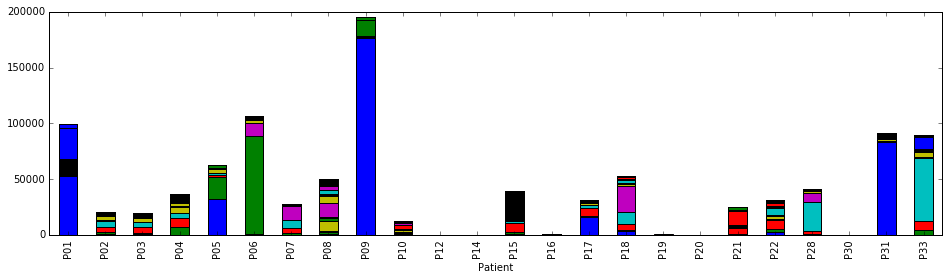

In [225]:
#Let's take a look at all the patients together
patients.plot(kind="bar", legend=False,figsize=(16,4), stacked=True)

In [226]:
#Again, a huge difference in the counts between patients.
data[data["Patient"] == "P12"]

,Samples,Patient,Cavities,SampleType,QC,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
20,Throat_P12,P12,cavities,Throat,Failed,7,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,Tongue_P12,P12,cavities,Tongue,Failed,21,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
#Ah! Patient12's samples are indeed problematic. They didn't pass the QC
#Let's remove all the failed QC from data
data = data[data["QC"] != "Failed"]
len(data)

36

In [228]:
data[(data["Patient"] == "P12") | (data["Patient"] == "P30")]

,Samples,Patient,Cavities,SampleType,QC,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma


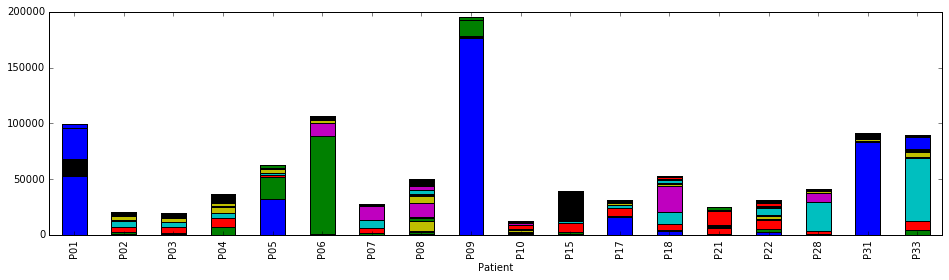

In [229]:
#Patients 12 and 30 have disappear.
#Let's look again at the patients count stacked bars
patients = data.groupby("Patient").sum()
patients.plot(kind="bar", legend=False,figsize=(16,4), stacked=True)

In [230]:
#Much better, but we still have a big difference. let's take a look at the shifted log
log_patients = np.log(patients)

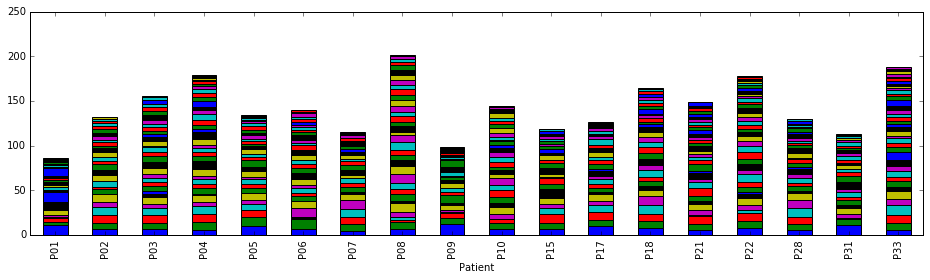

In [231]:
#Satcked bars graph again
log_patients.plot(kind="bar", legend=False,figsize=(16,4), stacked=True)

In [232]:
#Even better although we have to be careful
#Let's apply the log to the data
np.log(data)

AttributeError: 'str' object has no attribute 'log'

In [233]:
#The error comes from strings. We have to do a turn around.
#Let's select in a temporary dataframe all the numeric values
tmp = data.select_dtypes(include=[np.number])
#Add one so the log doesn't give an infinite number
tmp = tmp + 1 
tmp.head()

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,20284,33,13,2,7,118,13218,16040,7,2,...,1,1,2,1,1,1,1,1,1,1
1,32301,13,85,3,7,40,1660,11875,4,3,...,1,1,1,1,3,1,1,1,1,1
2,242,872,413,5462,468,2095,1,1,143,17,...,1,1,1,1,1,1,1,1,1,1
3,351,877,4364,2,45,1845,1,1,133,9,...,1,1,2,1,2,1,1,1,1,1
4,348,328,246,4895,54,898,20,28,72,20,...,1,1,1,1,1,1,1,4,1,1


In [234]:
data_log = data.copy() 
data_log.loc[:, tmp.columns] = np.log(tmp)
data_log.head()

,Samples,Patient,Cavities,SampleType,QC,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,P01,No_cavities,Throat,Passed,9.917588,3.496508,2.564949,0.693147,1.945910,...,0,0,0.693147,0,0.000000,0,0,0.000000,0,0
1,Tongue_P01,P01,No_cavities,Tongue,Passed,10.382853,2.564949,4.442651,1.098612,1.945910,...,0,0,0.000000,0,1.098612,0,0,0.000000,0,0
2,Throat_P02,P02,cavities,Throat,Passed,5.488938,6.770789,6.023448,8.605570,6.148468,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
3,Tongue_P02,P02,cavities,Tongue,Passed,5.860786,6.776507,8.381144,0.693147,3.806662,...,0,0,0.693147,0,0.693147,0,0,0.000000,0,0
4,Throat_P03,P03,cavities,Throat,Passed,5.852202,5.793014,5.505332,8.495970,3.988984,...,0,0,0.000000,0,0.000000,0,0,1.386294,0,0


In [235]:
#Now let's do a  spring tension graph to see if some pattern comes out from the data
from pandas.tools.plotting import radviz
#We need the data in the form of 
#one variable counts counts counts counts etc...
#Let's take the samples as variable and see how they 
data_log.head()
samples = data_log.drop(['Patient','Cavities','SampleType','QC'],1)
samples.head()

,Samples,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat_P01,9.917588,3.496508,2.564949,0.693147,1.945910,4.770685,9.489335,9.682841,1.945910,...,0,0,0.693147,0,0.000000,0,0,0.000000,0,0
1,Tongue_P01,10.382853,2.564949,4.442651,1.098612,1.945910,3.688879,7.414573,9.382191,1.386294,...,0,0,0.000000,0,1.098612,0,0,0.000000,0,0
2,Throat_P02,5.488938,6.770789,6.023448,8.605570,6.148468,7.647309,0.000000,0.000000,4.962845,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
3,Tongue_P02,5.860786,6.776507,8.381144,0.693147,3.806662,7.520235,0.000000,0.000000,4.890349,...,0,0,0.693147,0,0.693147,0,0,0.000000,0,0
4,Throat_P03,5.852202,5.793014,5.505332,8.495970,3.988984,6.800170,2.995732,3.332205,4.276666,...,0,0,0.000000,0,0.000000,0,0,1.386294,0,0


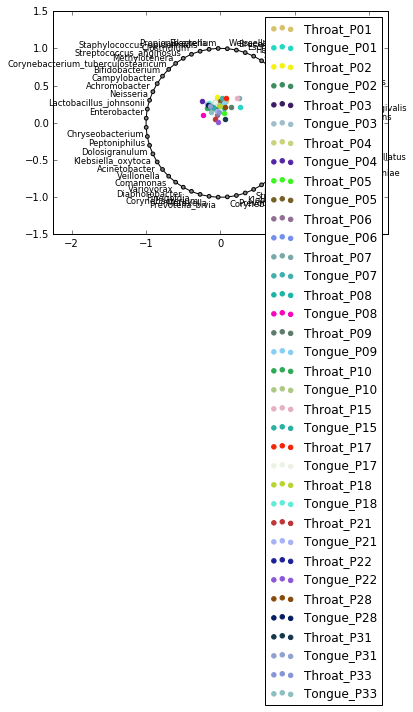

In [236]:
radviz(samples,"Samples")

In [237]:
#Hard to see a pattern, but that's not so anormal, we're looking at all the samples together.
#let's look at the location : throat vs Tongue
SampleType = data.groupby(["SampleType"]).sum()
SampleType.head()

,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
SampleType,,,,,,,,,,,,,,,,,,,,,
Throat,229032,64359,14923,120717,51993,19736,33045,16080,9371,2499,...,35,46,15,13,6,8,7,4,4,1
Tongue,144484,69780,56332,49,6835,27973,6400,11881,12250,14952,...,13,0,7,9,8,0,0,1,0,0


In [238]:
#This is not how we want the data to be. Let's remove SAmpleType from the index
SampleType = SampleType.reset_index(0, drop=False)
SampleType.head()

,SampleType,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat,229032,64359,14923,120717,51993,19736,33045,16080,9371,...,35,46,15,13,6,8,7,4,4,1
1,Tongue,144484,69780,56332,49,6835,27973,6400,11881,12250,...,13,0,7,9,8,0,0,1,0,0


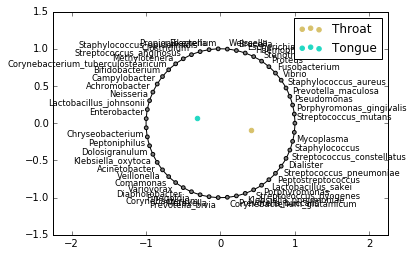

In [239]:
#Ok we can try radviz
radviz(SampleType,"SampleType")

In [240]:
#We do see a different pattern in the bacteria communities!
#The problem is that we could have all the samples per patient and not all added together
#We can do this by grouping by patients and sampleType together. Let's see
SampleType = data.groupby(["Patient", "SampleType"]).sum()
SampleType.head(n=2)

Streptococcus_mutans  Porphyromonas_gingivalis  \
Patient SampleType                                                   
P01     Throat                     20283                        32   
        Tongue                     32300                        12   

                    Pseudomonas  Prevotella_maculosa  Staphylococcus_aureus  \
Patient SampleType                                                            
P01     Throat               12                    1                      6   
        Tongue               84                    2                      6   

                    Vibrio  Fusobacterium  Proteus  Stenotrophomonas  \
Patient SampleType                                                     
P01     Throat         117          13217    16039                 6   
        Tongue          39           1659    11874                 3   

                    Haemophilus     ...      Klebsiella_pneumoniae  \
Patient SampleType                  ...                              
P01     Throat                1     ...                          0   
        Tongue                2     ...                          0   

                    Streptococcus_pyogenes  Porphyromonas  \
Patient SampleType                                          
P01     Throat                           0              1   
        Tongue                           0              0   

                    Lactobacillus_sakei  Peptostreptococcus  \
Patient SampleType                                            
P01     Throat                        0                   0   
        Tongue                        0                   2   

                    Streptococcus_pneumoniae  Dialister  \
Patient SampleType                                        
P01     Throat                             0          0   
        Tongue                             0          0   

                    Streptococcus_constellatus  Staphylococcus  Mycoplasma  
Patient SampleType                                                          
P01     Throat                               0               0           0  
        Tongue                               0               0           0  

[2 rows x 51 columns]

In [241]:
#We have 2 index nested. We will remove Patient and keep SampleType
SampleType = SampleType.reset_index(0, drop=True)
SampleType.head(n=2)


,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
SampleType,,,,,,,,,,,,,,,,,,,,,
Throat,20283,32,12,1,6,117,13217,16039,6,1,...,0,0,1,0,0,0,0,0,0,0
Tongue,32300,12,84,2,6,39,1659,11874,3,2,...,0,0,0,0,2,0,0,0,0,0


In [242]:
SampleType = SampleType.reset_index(0, drop=False)
SampleType.head()

,SampleType,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,Throat,20283,32,12,1,6,117,13217,16039,6,...,0,0,1,0,0,0,0,0,0,0
1,Tongue,32300,12,84,2,6,39,1659,11874,3,...,0,0,0,0,2,0,0,0,0,0
2,Throat,241,871,412,5461,467,2094,0,0,142,...,0,0,0,0,0,0,0,0,0,0
3,Tongue,350,876,4363,1,44,1844,0,0,132,...,0,0,1,0,1,0,0,0,0,0
4,Throat,347,327,245,4894,53,897,19,27,71,...,0,0,0,0,0,0,0,3,0,0


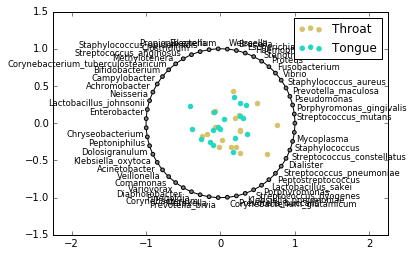

In [243]:
#All right, let's try radviz
radviz(SampleType,"SampleType")

In [244]:
#Let's see if the cavities influence the bacterial communities in the Throat
cavities = data_log.groupby(["Patient", "SampleType", "Cavities"]).sum()
cavities.head()

Streptococcus_mutans  \
Patient SampleType Cavities                            
P01     Throat     No_cavities              9.917588   
        Tongue     No_cavities             10.382853   
P02     Throat     cavities                 5.488938   
        Tongue     cavities                 5.860786   
P03     Throat     cavities                 5.852202   

                                Porphyromonas_gingivalis  Pseudomonas  \
Patient SampleType Cavities                                             
P01     Throat     No_cavities                  3.496508     2.564949   
        Tongue     No_cavities                  2.564949     4.442651   
P02     Throat     cavities                     6.770789     6.023448   
        Tongue     cavities                     6.776507     8.381144   
P03     Throat     cavities                     5.793014     5.505332   

                                Prevotella_maculosa  Staphylococcus_aureus  \
Patient SampleType Cavities                                                  
P01     Throat     No_cavities             0.693147               1.945910   
        Tongue     No_cavities             1.098612               1.945910   
P02     Throat     cavities                8.605570               6.148468   
        Tongue     cavities                0.693147               3.806662   
P03     Throat     cavities                8.495970               3.988984   

                                  Vibrio  Fusobacterium   Proteus  \
Patient SampleType Cavities                                         
P01     Throat     No_cavities  4.770685       9.489335  9.682841   
        Tongue     No_cavities  3.688879       7.414573  9.382191   
P02     Throat     cavities     7.647309       0.000000  0.000000   
        Tongue     cavities     7.520235       0.000000  0.000000   
P03     Throat     cavities     6.800170       2.995732  3.332205   

                                Stenotrophomonas  Haemophilus     ...      \
Patient SampleType Cavities                                       ...       
P01     Throat     No_cavities          1.945910     0.693147     ...       
        Tongue     No_cavities          1.386294     1.098612     ...       
P02     Throat     cavities             4.962845     2.833213     ...       
        Tongue     cavities             4.890349     2.197225     ...       
P03     Throat     cavities             4.276666     2.995732     ...       

                                Klebsiella_pneumoniae  Streptococcus_pyogenes  \
Patient SampleType Cavities                                                     
P01     Throat     No_cavities                      0                       0   
        Tongue     No_cavities                      0                       0   
P02     Throat     cavities                         0                       0   
        Tongue     cavities                         0                       0   
P03     Throat     cavities                         0                       0   

                                Porphyromonas  Lactobacillus_sakei  \
Patient SampleType Cavities                                          
P01     Throat     No_cavities       0.693147                    0   
        Tongue     No_cavities       0.000000                    0   
P02     Throat     cavities          0.000000                    0   
        Tongue     cavities          0.693147                    0   
P03     Throat     cavities          0.000000                    0   

                                Peptostreptococcus  Streptococcus_pneumoniae  \
Patient SampleType Cavities                                                    
P01     Throat     No_cavities            0.000000                         0   
        Tongue     No_cavities            1.098612                         0   
P02     Throat     cavities               0.000000                         0   
        Tongue     cavities               0.693147                         0   
P03     Throat   

In [245]:
#We don't need the patient information
cavities = cavities.reset_index(0, drop=True)
cavities.head()

,,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,Haemophilus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
SampleType,Cavities,,,,,,,,,,,,,,,,,,,,,
Throat,No_cavities,9.917588,3.496508,2.564949,0.693147,1.945910,4.770685,9.489335,9.682841,1.945910,0.693147,...,0,0,0.693147,0,0.000000,0,0,0.000000,0,0
Tongue,No_cavities,10.382853,2.564949,4.442651,1.098612,1.945910,3.688879,7.414573,9.382191,1.386294,1.098612,...,0,0,0.000000,0,1.098612,0,0,0.000000,0,0
Throat,cavities,5.488938,6.770789,6.023448,8.605570,6.148468,7.647309,0.000000,0.000000,4.962845,2.833213,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
Tongue,cavities,5.860786,6.776507,8.381144,0.693147,3.806662,7.520235,0.000000,0.000000,4.890349,2.197225,...,0,0,0.693147,0,0.693147,0,0,0.000000,0,0
Throat,cavities,5.852202,5.793014,5.505332,8.495970,3.988984,6.800170,2.995732,3.332205,4.276666,2.995732,...,0,0,0.000000,0,0.000000,0,0,1.386294,0,0


In [246]:
#We will separate the Throat data from the Tongue so wee keep the indexes
cavities=cavities.reset_index(0, drop=False)
cavities.head()

,SampleType,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
Cavities,,,,,,,,,,,,,,,,,,,,,
No_cavities,Throat,9.917588,3.496508,2.564949,0.693147,1.945910,4.770685,9.489335,9.682841,1.945910,...,0,0,0.693147,0,0.000000,0,0,0.000000,0,0
No_cavities,Tongue,10.382853,2.564949,4.442651,1.098612,1.945910,3.688879,7.414573,9.382191,1.386294,...,0,0,0.000000,0,1.098612,0,0,0.000000,0,0
cavities,Throat,5.488938,6.770789,6.023448,8.605570,6.148468,7.647309,0.000000,0.000000,4.962845,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
cavities,Tongue,5.860786,6.776507,8.381144,0.693147,3.806662,7.520235,0.000000,0.000000,4.890349,...,0,0,0.693147,0,0.693147,0,0,0.000000,0,0
cavities,Throat,5.852202,5.793014,5.505332,8.495970,3.988984,6.800170,2.995732,3.332205,4.276666,...,0,0,0.000000,0,0.000000,0,0,1.386294,0,0


In [247]:
cavities=cavities.reset_index(0, drop=False)
cavities.head()

,Cavities,SampleType,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
0,No_cavities,Throat,9.917588,3.496508,2.564949,0.693147,1.945910,4.770685,9.489335,9.682841,...,0,0,0.693147,0,0.000000,0,0,0.000000,0,0
1,No_cavities,Tongue,10.382853,2.564949,4.442651,1.098612,1.945910,3.688879,7.414573,9.382191,...,0,0,0.000000,0,1.098612,0,0,0.000000,0,0
2,cavities,Throat,5.488938,6.770789,6.023448,8.605570,6.148468,7.647309,0.000000,0.000000,...,0,0,0.000000,0,0.000000,0,0,0.000000,0,0
3,cavities,Tongue,5.860786,6.776507,8.381144,0.693147,3.806662,7.520235,0.000000,0.000000,...,0,0,0.693147,0,0.693147,0,0,0.000000,0,0
4,cavities,Throat,5.852202,5.793014,5.505332,8.495970,3.988984,6.800170,2.995732,3.332205,...,0,0,0.000000,0,0.000000,0,0,1.386294,0,0


In [248]:
#Let's create 2 dataframe and remove the SampleType columns
throat = cavities[cavities['SampleType'] == "Throat"]
throat = throat.drop(['SampleType'],1)
tongue = cavities[cavities["SampleType"] == "Tongue"]
tongue = tongue.drop(['SampleType'],1)
tongue.head(n=3)

,Cavities,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa,Staphylococcus_aureus,Vibrio,Fusobacterium,Proteus,Stenotrophomonas,...,Klebsiella_pneumoniae,Streptococcus_pyogenes,Porphyromonas,Lactobacillus_sakei,Peptostreptococcus,Streptococcus_pneumoniae,Dialister,Streptococcus_constellatus,Staphylococcus,Mycoplasma
1,No_cavities,10.382853,2.564949,4.442651,1.098612,1.945910,3.688879,7.414573,9.382191,1.386294,...,0,0,0.000000,0,1.098612,0,0,0,0,0
3,cavities,5.860786,6.776507,8.381144,0.693147,3.806662,7.520235,0.000000,0.000000,4.890349,...,0,0,0.693147,0,0.693147,0,0,0,0,0
5,cavities,5.774552,6.679599,8.468213,0.000000,3.258097,7.784057,0.693147,0.000000,4.787492,...,0,0,0.000000,0,0.000000,0,0,0,0,0


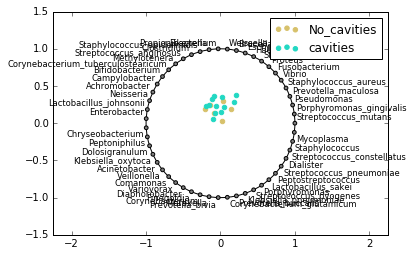

In [249]:
#Let's radviz the throat!
radviz(throat,"Cavities")

In [250]:
tonguez = tongue.copy()
tonguez = tonguez.ix[:,'Cavities':'Prevotella_maculosa']
tonguez.head(n=30)

,Cavities,Streptococcus_mutans,Porphyromonas_gingivalis,Pseudomonas,Prevotella_maculosa
1,No_cavities,10.382853,2.564949,4.442651,1.098612
3,cavities,5.860786,6.776507,8.381144,0.693147
5,cavities,5.774552,6.679599,8.468213,0.000000
7,cavities,5.459586,8.590444,8.911934,1.098612
9,cavities,8.845201,9.826822,7.693937,0.000000
11,No_cavities,6.971669,10.511540,1.098612,0.693147
13,cavities,4.369448,6.967909,8.417152,1.098612
15,No_cavities,6.834109,6.881411,2.564949,2.944439
17,No_cavities,11.394119,5.293305,6.011267,0.693147
19,No_cavities,4.744932,6.405228,1.386294,0.000000


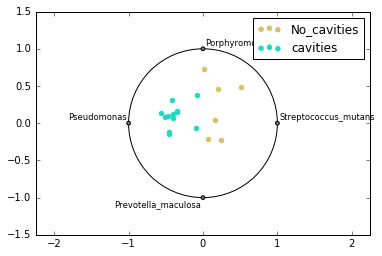

In [251]:
#Now the tongue!
radviz(tonguez,"Cavities")